In [189]:
#Importando as bibliotecas
import warnings
warnings.filterwarnings('ignore')
#pandas
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib as mpl
import locale



In [190]:
#importando o dataset

#Dataset 16 ao 26/01/2024
df_pacotes_entregues = pd.read_csv('./01_20022024_cpf.csv',delimiter=';')


In [191]:
#df_pacotes_entregues.drop_duplicates(subset=['id_pacotes'],inplace=True)

#df_pacotes_entregues['id_pacotes'] = df_pacotes_entregues['id_pacotes'].astype(str)

#df_pacotes_entregues.head()

In [192]:
#Verificando a dimensão

df_pacotes_entregues.shape

(425089, 11)

In [193]:
df_pacotes_entregues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425089 entries, 0 to 425088
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id_pacote            425089 non-null  int64 
 1   galpao               425089 non-null  object
 2   CNPJ                 425089 non-null  int64 
 3   entregador           425089 non-null  object
 4   Marca de assinatura  425089 non-null  object
 5   Valor Mercadoria     425089 non-null  object
 6   CEP destino          425089 non-null  int64 
 7   cidade               425089 non-null  object
 8   bairro               425053 non-null  object
 9   cliente              425089 non-null  object
 10  Horário da entrega   425089 non-null  object
dtypes: int64(3), object(8)
memory usage: 35.7+ MB


### Verificando os nulos

df_pacotes_entregues.isnull().sum()

In [194]:
df_pacotes_entregues.rename(columns={'id_pacote':'ID_PACOTE',
                                     'galpao':'GALPAO',
                                     'entregador':'ENTREGADOR',
                                     'Valor Mercadoria':'VALOR_MERCADORIA',
                                     'CEP destino':'CEP',
                                     'Marca de assinatura':'ASSINATURA',
                                     'Endereço completo':'ENDERECO_COMPLETO',
                                     'cidade':'CIDADE',
                                     'bairro':'BAIRRO',
                                     'cliente':'DESTINATARIO',
                                     'Horário da entrega':'HORARIO_ENTREGA',
                                     'CNPJ':'CPF_CNPJ'}, inplace=True) 

In [195]:
#modificando as string para maiusculas

df_pacotes_entregues['ENTREGADOR'] = df_pacotes_entregues['ENTREGADOR'].str.upper()

df_pacotes_entregues['CIDADE'] = df_pacotes_entregues['CIDADE'].str.upper()

df_pacotes_entregues['BAIRRO'] = df_pacotes_entregues['BAIRRO'].str.upper()

df_pacotes_entregues['DESTINATARIO'] = df_pacotes_entregues['DESTINATARIO'].str.upper()

df_pacotes_entregues['ASSINATURA'] = df_pacotes_entregues['ASSINATURA'].str.upper()

#df_pacotes_entregues['ENDERECO_COMPLETO'] = df_pacotes_entregues['ENDERECO_COMPLETO'].str.upper()



In [196]:
#Moficando o tipo do atributo para string

df_pacotes_entregues['CPF_CNPJ'] = df_pacotes_entregues['CPF_CNPJ'].astype(str)

#modifica a virgula por ponto

df_pacotes_entregues['VALOR_MERCADORIA'] = df_pacotes_entregues['VALOR_MERCADORIA'].str.replace(',','.')

#df_pacotes_entregues['PESO_COBRAVEL'] = df_pacotes_entregues['PESO_COBRAVEL'].str.replace(',','.')

#transformando o atributo em float

df_pacotes_entregues['VALOR_MERCADORIA'] = df_pacotes_entregues['VALOR_MERCADORIA'].astype(float)

#df_pacotes_entregues['PESO_COBRAVEL'] = df_pacotes_entregues['PESO_COBRAVEL'].astype(float)


In [197]:
#transformando no tipo datetime
df_pacotes_entregues['HORARIO_ENTREGA'] = pd.to_datetime(df_pacotes_entregues['HORARIO_ENTREGA'])

#Extrair somente a data
df_pacotes_entregues['HORARIO_ENTREGA'] = df_pacotes_entregues['HORARIO_ENTREGA'].dt.date

#Transformando novamente para datetime, porque quando extrai somente a data
# o atributo é convertido para string(object)

df_pacotes_entregues['HORARIO_ENTREGA'] = pd.to_datetime(df_pacotes_entregues['HORARIO_ENTREGA'])


In [198]:
#Filtrando somente os valores nulos do atributo 'CEP'
#Acima, filtrei somente os nulos e mostra que são multiplos que 
#não eram para ter aparecido.

df_pacotes_nao_entregues = df_pacotes_entregues[df_pacotes_entregues['BAIRRO'].isna()]

df_pacotes_nao_entregues.shape

(36, 11)

In [199]:
#Modificando o missings por "BAIRRO INEXISTENTE'

df_pacotes_entregues['BAIRRO'].fillna('BAIRRO INEXISTENTE',inplace=True)

#excluindo os valores nulos 

df_pacotes_entregues_clear = df_pacotes_entregues.dropna(subset=['CEP'])

df_pacotes_entregues_clear.isnull().sum()

ID_PACOTE           0
GALPAO              0
CPF_CNPJ            0
ENTREGADOR          0
ASSINATURA          0
VALOR_MERCADORIA    0
CEP                 0
CIDADE              0
BAIRRO              0
DESTINATARIO        0
HORARIO_ENTREGA     0
dtype: int64

In [200]:
#Verificando se existem pedidos duplicados

df_pacotes_entregues_clear['ID_PACOTE'].value_counts()

ID_PACOTE
428030031428439    2
428500762428013    2
428500764428585    2
428030035142855    2
428000417428124    2
                  ..
428500763565449    1
428500763500263    1
428500763148707    1
428500763087745    1
428700017754968    1
Name: count, Length: 425055, dtype: int64

In [201]:
#Excluindo pedido duplicados

df_pacotes_entregues_clear.drop_duplicates(subset=['ID_PACOTE'],inplace=True)

#Exibindo a dimensão

df_pacotes_entregues_clear.shape

(425055, 11)

In [202]:
#Exibindos as informaçoes do dataframe
df_pacotes_entregues_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425055 entries, 0 to 425088
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID_PACOTE         425055 non-null  int64         
 1   GALPAO            425055 non-null  object        
 2   CPF_CNPJ          425055 non-null  object        
 3   ENTREGADOR        425055 non-null  object        
 4   ASSINATURA        425055 non-null  object        
 5   VALOR_MERCADORIA  425055 non-null  float64       
 6   CEP               425055 non-null  int64         
 7   CIDADE            425055 non-null  object        
 8   BAIRRO            425055 non-null  object        
 9   DESTINATARIO      425055 non-null  object        
 10  HORARIO_ENTREGA   425055 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 38.9+ MB


In [203]:
#Exportando os dataframe para csv

df_pacotes_entregues_clear.to_csv('./pacotes_entregues_01_08022024_processado.csv',encoding='utf-8', index=False)

# exportando os pacotes não entregue

df_pacotes_nao_entregues.to_csv('./pacotes_nao_entregues_01_08022024_processado.csv',encoding='utf-8', index=False)

Inicio do tratamento do dataframe agregados


In [204]:
#dataset motorista
df_agregado = pd.read_csv('./agregados.csv',delimiter=';')

#Verificando a dimensão
df_agregado.shape

(6717, 6)

In [205]:
df_agregado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PLACA           6717 non-null   object
 1   BASE_VINCULADO  6710 non-null   object
 2   TIPO_VEICULO    6717 non-null   object
 3   MARCA_VEICULO   6717 non-null   object
 4   AGREGADO        6717 non-null   object
 5   CPF_CNPJ        6717 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 315.0+ KB


In [206]:
#Exibindo somente as colunas selecionadas
df_agregados_colunas = df_agregado.loc[:,['TIPO_VEICULO','AGREGADO','CPF_CNPJ']]

In [207]:
#Renomeando os atributos

#df_agregados_colunas.rename(columns={'Nome de tipo de veículo':'TIPO_VEICULO',
#                                     'Nome do condutor':'ENTREGADOR',
#                                     'CPF':'CPF_CNPJ'},inplace=True)

In [208]:
#excluíndo cpf duplicados

df_agregados_colunas.duplicated(subset=['CPF_CNPJ']).sum()

0

In [209]:
#Armazenando os CPF duplicados e logo apos a exclusão.
df_agregados_duplicado = df_agregados_colunas[df_agregados_colunas.duplicated(subset=['CPF_CNPJ'])]

# Excluíndo as linhas duplicadas

df_agregados_clean = df_agregados_colunas.drop_duplicates(subset=['CPF_CNPJ'])

#Exibindo as dimensão


In [210]:
#Verificando o que são os missings
#df_agregados_clean[df_agregados_clean['NOME_BASE'].isna()]

In [211]:
#Modificando os missings para 'RJ' somente para ter uma base vinculada
#df_agregados_clean['NOME_BASE'].fillna('RJ',inplace=True)

#Verificando se existe missings
#df_agregados_clean.isnull().sum()

In [212]:
#Verificando os tidos de veículos
df_agregados_clean['TIPO_VEICULO'].unique()

array(['CARRO', 'MOTO', 'BIKE'], dtype=object)

In [213]:
# Alterando os nomes do Veículos para ter somente CARRO e MOTO

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('FIORINO','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('PASSEIO','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('Utilitário','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('HR-Furgão','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('Truck','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('Camionete','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('Furgao','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('Furgao','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('VUC','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('3/4','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('Baú','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('VAN','CARRO')

df_agregados_clean['TIPO_VEICULO'] = df_agregados_clean['TIPO_VEICULO'].replace('Moto','MOTO')

In [214]:
#Mostrando as informações do dataframe

df_agregados_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TIPO_VEICULO  6717 non-null   object
 1   AGREGADO      6717 non-null   object
 2   CPF_CNPJ      6717 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 157.6+ KB


In [215]:
#Buscando os agregados que são tipo bike e estão especificados no nome.
#.loc serve para mostrar somente o atributos especifico
#str.contains('BIKE') -> Busca por essa palavras em uma string dentro do atributos
#,(TIPO_VEICULO)] = 'BIKE' -> Muda as linha que está na pesquisa em um nome especificado 'BIKE'


df_agregados_clean.loc[df_agregados_clean['AGREGADO'].str.contains('BIKE'), 'TIPO_VEICULO'] = 'BIKE'

In [216]:
#Verificando se existe duplicados
df_agregados_clean.duplicated(subset=['CPF_CNPJ']).sum()

0

In [217]:
#VErificando a dimensão - A quantidade de linhas e colunas.
df_agregados_clean.shape

(6717, 3)

In [218]:
df_agregados_clean.to_csv('entregador_motorista_processado.csv',encoding='utf-8',index=False)

In [219]:
#Transformando do tipo do atributo 'CPF_CNPJ' para string e apos realizar o join
df_agregados_clean['CPF_CNPJ'] = df_agregados_clean['CPF_CNPJ'].astype(str)

In [220]:
#Fazendo o Join  entre o dataframe df_pacotes X df_agregados

df_pacotes_agregados = pd.merge(df_pacotes_entregues_clear,df_agregados_clean,on=['CPF_CNPJ'],how='left')
                                
df_pacotes_agregados.shape

(425055, 13)

In [221]:
#Exibindo as info da dataframe

df_pacotes_agregados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425055 entries, 0 to 425054
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID_PACOTE         425055 non-null  int64         
 1   GALPAO            425055 non-null  object        
 2   CPF_CNPJ          425055 non-null  object        
 3   ENTREGADOR        425055 non-null  object        
 4   ASSINATURA        425055 non-null  object        
 5   VALOR_MERCADORIA  425055 non-null  float64       
 6   CEP               425055 non-null  int64         
 7   CIDADE            425055 non-null  object        
 8   BAIRRO            425055 non-null  object        
 9   DESTINATARIO      425055 non-null  object        
 10  HORARIO_ENTREGA   425055 non-null  datetime64[ns]
 11  TIPO_VEICULO      392246 non-null  object        
 12  AGREGADO          392246 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memor

In [222]:
#Exibindo 5 linhas do dataframe

df_pacotes_agregados.head()

,ID_PACOTE,GALPAO,CPF_CNPJ,ENTREGADOR,ASSINATURA,VALOR_MERCADORIA,CEP,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,TIPO_VEICULO,AGREGADO
0,428000386298766,ARMAZEM VELOZ,18074896714,TAC CARRO - GABRIEL CAMPOS DO NASCIMENTO,RECEBIMENTO COM ASSINATURA NORMAL,14.71,27963834,MACAÉ,PARQUE AEROPORTO,MARIA CLARA OLIVEIRA GODIM,2024-02-20,CARRO,TAC CARRO - GABRIEL CAMPOS DO NASCIMENTO
1,428000391566202,CENTRO DE ENTREGA AGIL,12860988742,TAC CARRO - YAGO CORDEIRO MOTTA GAMA,RECEBIMENTO COM ASSINATURA NORMAL,54.56,25870000,COMENDADOR LEVY GASPARIAN,BAIRRO INEXISTENTE,LARISSA VITÓRIA,2024-02-20,CARRO,TAC CARRO - YAGO CORDEIRO MOTTA GAMA
2,428000392336535,DEPOSITO EXPRESSO,13159206700,MEI CARRO - REGISON SAMPAIO DEL SANTO,RECEBIMENTO COM ASSINATURA NORMAL,129.45,29913300,LINHARES,RIO QUARTEL,ROSIMEIRE SILVA SANTOS,2024-02-20,CARRO,MEI CARRO - REGISON SAMPAIO DEL SANTO
3,428000401283352,DISTRIBUIÇÃO RAPIDA,9164050793,MEI CARRO - CARLOS EDUARDO DE CARVALHO DIAS,RECEBIMENTO COM ASSINATURA NORMAL,20.00,21520020,RIO DE JANEIRO,PAVUNA,ANA DIAS,2024-02-20,CARRO,MEI CARRO - CARLOS EDUARDO DE CARVALHO DIAS
4,428000402921304,CENTRO DE ENTREGA AGIL,10429572743,TAC MOTO - DIEGO PINHEIRO DE OLIVEIRA,RECEBIMENTO COM ASSINATURA NORMAL,26.87,28630391,NOVA FRIBURGO,SAO GERALDO,LAVYNIA SCHIMIDT,2024-02-20,MOTO,TAC MOTO - DIEGO PINHEIRO DE OLIVEIRA


In [223]:
#Excluindo a colunas que replicou

#df_pacotes_agregados.drop(['AGREGADO_y'],axis=1,inplace=True)

df_pacotes_agregados.drop(['AGREGADO'],inplace=True,axis=1)
#Modificando o nome da colunas
#df_pacotes_agregados.rename(columns={'AGREGADO_x':'AGREGADO'},inplace=True)

#Exibindo as informações do dataframe

df_pacotes_agregados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425055 entries, 0 to 425054
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID_PACOTE         425055 non-null  int64         
 1   GALPAO            425055 non-null  object        
 2   CPF_CNPJ          425055 non-null  object        
 3   ENTREGADOR        425055 non-null  object        
 4   ASSINATURA        425055 non-null  object        
 5   VALOR_MERCADORIA  425055 non-null  float64       
 6   CEP               425055 non-null  int64         
 7   CIDADE            425055 non-null  object        
 8   BAIRRO            425055 non-null  object        
 9   DESTINATARIO      425055 non-null  object        
 10  HORARIO_ENTREGA   425055 non-null  datetime64[ns]
 11  TIPO_VEICULO      392246 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 38.9+ MB


In [224]:
#Importando o dataset que contém os valores
df_valores = pd.read_csv('./precificacao_080224.csv', encoding='ISO8859-1' ,delimiter=';')

#Modificando o tipo do bairro

df_valores['BAIRRO'].replace('BAIRRO INEXISTENTE','BAIRRO DESCONHECIDO',inplace=True)

#Exibindo o dataframe

df_valores.head()

,CIDADE,BAIRRO,TIPO_VEICULO,VALOR
0,NOVA IGUAÇU,BAIRRO DESCONHECIDO,CARRO,"1,6"
1,NOVA IGUAÇU,KM 31,CARRO,"3,5"
2,QUEIMADOS,BAIRRO DESCONHECIDO,CARRO,"1,6"
3,MESQUITA,BAIRRO DESCONHECIDO,CARRO,"1,6"
4,JAPERI,BAIRRO DESCONHECIDO,CARRO,3


In [225]:
#Realizando um Join com o dataframe de valores

df_pacotes_full = pd.merge(df_pacotes_agregados,df_valores,on=['CIDADE','BAIRRO','TIPO_VEICULO'],how='left')


In [226]:
#Filtrando os pacotes nulos

df_nulos = df_pacotes_full[df_pacotes_full['VALOR'].isna()]


In [227]:
#Excluíndo os atributos para realizar um novo join

df_nulos.drop(['VALOR'],axis=1,inplace=True)


In [228]:
#Realizando o JOin com os pedidos que não possuem bairros cadastrados

df_nulos_proc = pd.merge(df_nulos,df_valores,on=['CIDADE','TIPO_VEICULO'],how='left')

#Excluí os duplicados

df_nulos_proc.drop_duplicates(subset=['ID_PACOTE'],inplace=True)



In [229]:
#Excluíndo o atributo duplicado

df_nulos_proc.drop(['BAIRRO_y'],axis=1,inplace=True)

#modificando o nome do atributo

df_nulos_proc.rename(columns={'BAIRRO_x':'BAIRRO'},inplace=True)


In [230]:
#Excluído valores nulos do atributo 'VALOR'
df_pacotes_full.dropna(subset=['VALOR'],inplace=True)


In [231]:
df_pacotes_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76292 entries, 45 to 426213
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_PACOTE         76292 non-null  int64         
 1   GALPAO            76292 non-null  object        
 2   CPF_CNPJ          76292 non-null  object        
 3   ENTREGADOR        76292 non-null  object        
 4   ASSINATURA        76292 non-null  object        
 5   VALOR_MERCADORIA  76292 non-null  float64       
 6   CEP               76292 non-null  int64         
 7   CIDADE            76292 non-null  object        
 8   BAIRRO            76292 non-null  object        
 9   DESTINATARIO      76292 non-null  object        
 10  HORARIO_ENTREGA   76292 non-null  datetime64[ns]
 11  TIPO_VEICULO      76292 non-null  object        
 12  VALOR             76292 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 8.1+ MB


In [232]:
#Exibindo o dataframe

df_pacotes_full.head()

,ID_PACOTE,GALPAO,CPF_CNPJ,ENTREGADOR,ASSINATURA,VALOR_MERCADORIA,CEP,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,TIPO_VEICULO,VALOR
45,428000418686845,HUB EFICIENTE,12330348711,MEI CARRO - IAGO LEMOS SANTANA DA SILVA,RECEBIMENTO COM ASSINATURA NORMAL,147.72,23550105,RIO DE JANEIRO,SANTA CRUZ,RENATA PEREIRA DOS SANTOS,2024-02-20,CARRO,"1,6"
53,428000419471832,HUB EFICIENTE,9191150710,MEI CARRO - FERNANDO LEITE GOMES,RECEBIMENTO COM ASSINATURA NORMAL,75.88,22011100,RIO DE JANEIRO,COPACABANA,FABIA RODRIGUES,2024-02-20,CARRO,"1,6"
115,428000422985862,CENTRO DE ENTREGA AGIL,6334226738,MEI MOTO - LUCAS BITTENCOURT DA SILVA,RECEBIMENTO COM ASSINATURA NORMAL,14.93,25957185,TERESÓPOLIS,BARROSO,HELENA NEVES SOARES LEITE,2024-02-20,MOTO,"1,6"
173,428000425257729,CENTRO DE ENTREGA AGIL,12292829711,MEI CARRO - GUILHERME FLORIANO DA PENHA,RECEBIMENTO COM ASSINATURA NORMAL,529.81,25640550,PETRÓPOLIS,ALTO DA SERRA,JULIANA CORRÊA,2024-02-20,CARRO,"1,5"
189,428030024515840,CENTRO DE ENTREGA AGIL,14983765760,MEI CARRO - LEON PABLO CRELIER DE MOURA,RECEBIMENTO COM ASSINATURA NORMAL,59.90,25035020,DUQUE DE CAXIAS,VILA LEOPOLDINA,LAISLA,2024-02-20,CARRO,"1,6"


In [233]:
#excluído os atributos

#df_pacotes_full.drop(['PLACA','BASE_ENTREGA_y','NOME_BASE'],axis=1,inplace=True)

#Renomear o atributo BASE_ENTREGA_X

#df_pacotes_full.rename(columns={'BASE_ENTREGA_x':'BASE_ENTREGA'},inplace=True)


In [234]:
#Concatenando

df_fechamento_full = pd.concat([df_pacotes_full,df_nulos_proc])


In [235]:
#Verificacao de mnulos

df_fechamento_full['ID_PACOTE'].value_counts()

ID_PACOTE
428500774222762    2
428030034646363    2
428030033038640    2
428000423451174    2
428030034622167    2
                  ..
428500775360965    1
428500775352105    1
428500775344281    1
428500775343095    1
428700016916209    1
Name: count, Length: 425055, dtype: int64

In [236]:
#Excluíndo os duplicados

df_fechamento_full.drop_duplicates(subset=['ID_PACOTE'],inplace=True)


In [238]:
df_fechamento_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425055 entries, 45 to 5237737
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID_PACOTE         425055 non-null  int64         
 1   GALPAO            425055 non-null  object        
 2   CPF_CNPJ          425055 non-null  object        
 3   ENTREGADOR        425055 non-null  object        
 4   ASSINATURA        425055 non-null  object        
 5   VALOR_MERCADORIA  425055 non-null  float64       
 6   CEP               425055 non-null  int64         
 7   CIDADE            425055 non-null  object        
 8   BAIRRO            425055 non-null  object        
 9   DESTINATARIO      425055 non-null  object        
 10  HORARIO_ENTREGA   425055 non-null  datetime64[ns]
 11  TIPO_VEICULO      392246 non-null  object        
 12  VALOR             392241 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory u

In [239]:
#Excluíndo atributos desnecessários.

#df_fechamento_full.drop(['BASE_ENTREGA_x','BASE_ENTREGA_y'],axis=1,inplace=True)


In [241]:
#Exibindo os pedido que não tiver valor da entrega

df_fechamento_full[df_fechamento_full['VALOR'].isna()]

,ID_PACOTE,GALPAO,CPF_CNPJ,ENTREGADOR,ASSINATURA,VALOR_MERCADORIA,CEP,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,TIPO_VEICULO,VALOR
565,428000416814605,ARMAZEM VELOZ,14495034707,TAC CARRO - LUIZ RAFAEL PRUDENTE PAURA,RECEBIMENTO COM ASSINATURA NORMAL,9.75,28983372,ARARUAMA,PARATY,LUCIMAR MARINHO DE SOUZA,2024-02-20,NaN,NaN
1178,428000419964130,ARMAZEM VELOZ,14495034707,TAC CARRO - LUIZ RAFAEL PRUDENTE PAURA,RECEBIMENTO COM ASSINATURA NORMAL,41.90,28971524,ARARUAMA,CENTRO (IGUABINHA),ANDREIA SOLANGE LINO,2024-02-20,NaN,NaN
1765,428000421391262,ARMAZEM VELOZ,14495034707,TAC CARRO - LUIZ RAFAEL PRUDENTE PAURA,RECEBIMENTO COM ASSINATURA NORMAL,71.10,28970735,ARARUAMA,NOVO HORIZONTE (IGUABINHA),MARCELLA MARTINS PEDRO,2024-02-20,NaN,NaN
1855,428000421654395,ARMAZEM VELOZ,14495034707,TAC CARRO - LUIZ RAFAEL PRUDENTE PAURA,RECEBIMENTO COM ASSINATURA NORMAL,131.32,28971353,ARARUAMA,CENTRO (IGUABINHA),NATHANE LEMOS BARBOSA,2024-02-20,NaN,NaN
2215,428000422563173,ARMAZEM VELOZ,14495034707,TAC CARRO - LUIZ RAFAEL PRUDENTE PAURA,RECEBIMENTO COM ASSINATURA NORMAL,8.90,28971257,ARARUAMA,CENTRO (IGUABINHA),SAMARA COUTINHO DA SILVA,2024-02-20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237730,428500755493989,DISTRIBUIÇÃO RAPIDA,11143776780,ETC TIME FAST BIKE - VINICIUS EUGENIO DOS SANTOS,RECEBIMENTO COM ASSINATURA NORMAL,22.00,25571090,SÃO JOÃO DE MERITI,JARDIM PARAISO,ALISSON RENAN LEITE DA CUNHA,2024-02-01,NaN,NaN
5237731,428500755564934,DISTRIBUIÇÃO RAPIDA,11345106750,ETC TIME FAST CARRO - JONATHAN TEIXEIRA FONSECA,RECEBIMENTO COM ASSINATURA NORMAL,0.25,25570393,SÃO JOÃO DE MERITI,JARDIM SANTA ROSA,CRISTIANE MARTINS DE SÁ DE MAGALHÃES,2024-02-01,NaN,NaN
5237732,428500755707827,DISTRIBUIÇÃO RAPIDA,11345106750,ETC TIME FAST CARRO - JONATHAN TEIXEIRA FONSECA,RECEBIMENTO COM ASSINATURA NORMAL,46.66,25571140,SÃO JOÃO DE MERITI,JARDIM PARAISO,THAIANE P. DO NASCIMENTO,2024-02-01,NaN,NaN
5237733,428500755733335,DISTRIBUIÇÃO RAPIDA,11345106750,ETC TIME FAST CARRO - JONATHAN TEIXEIRA FONSECA,RECEBIMENTO COM ASSINATURA NORMAL,22.40,25571120,SÃO JOÃO DE MERITI,JARDIM PARAISO,JACQUELINE TEIXEIRA,2024-02-01,NaN,NaN


In [242]:
df_fechamento_full.shape

(425055, 13)

In [243]:
#Exportando para csv

df_fechamento_full.to_csv('FEVEREIRO_proc.csv',encoding='utf-8',index=False)

3. ANALISE EXPLORATORIA

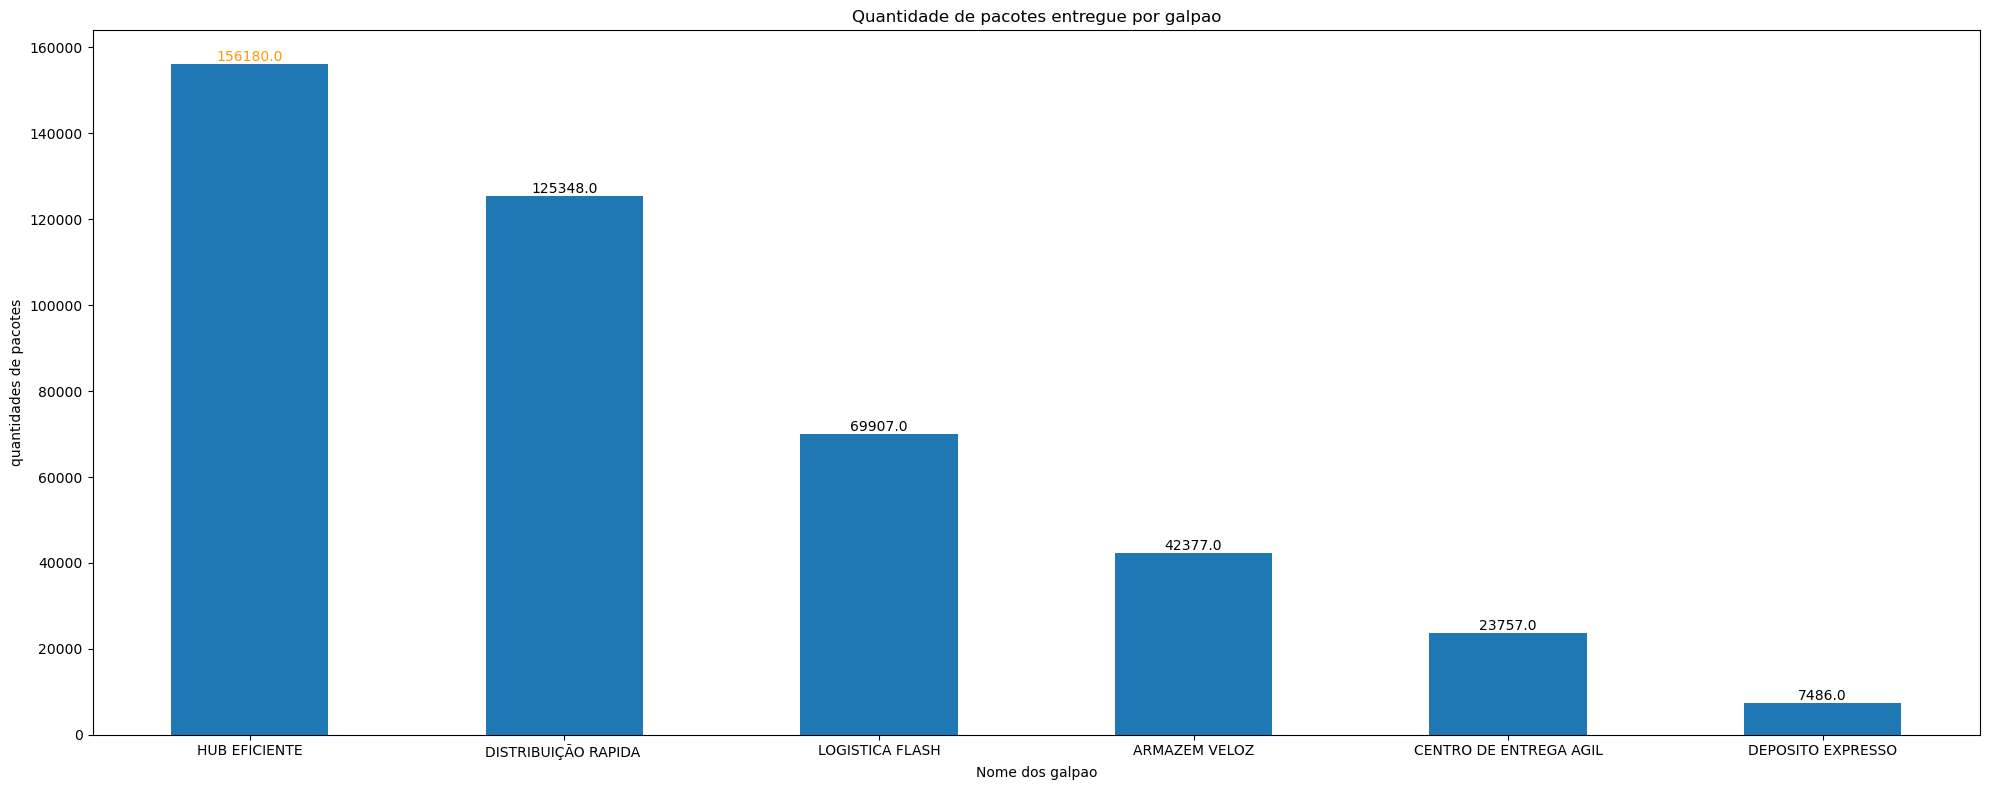

In [246]:
#Contagem de pacotes por galpao

df_galpao = df_fechamento_full['GALPAO'].value_counts()

#Plotando grafico

# Função pyplot.bar()
fig , ax = plt.subplots(figsize=(20,8))

# plota o gráfico de barras
df_galpao.plot(kind='bar', legend=False)
plt.title('Quantidade de pacotes entregue por galpao')
plt.xlabel("Nome dos galpao")
plt.ylabel('quantidades de pacotes')

# Acrescenta os valores sobre as barras

b1 = ax.bar_label(ax.containers[0], fmt="%.1f")
b1[0].set_color("#ff9900")
# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

# Exibe o gráfico
plt.show()
     

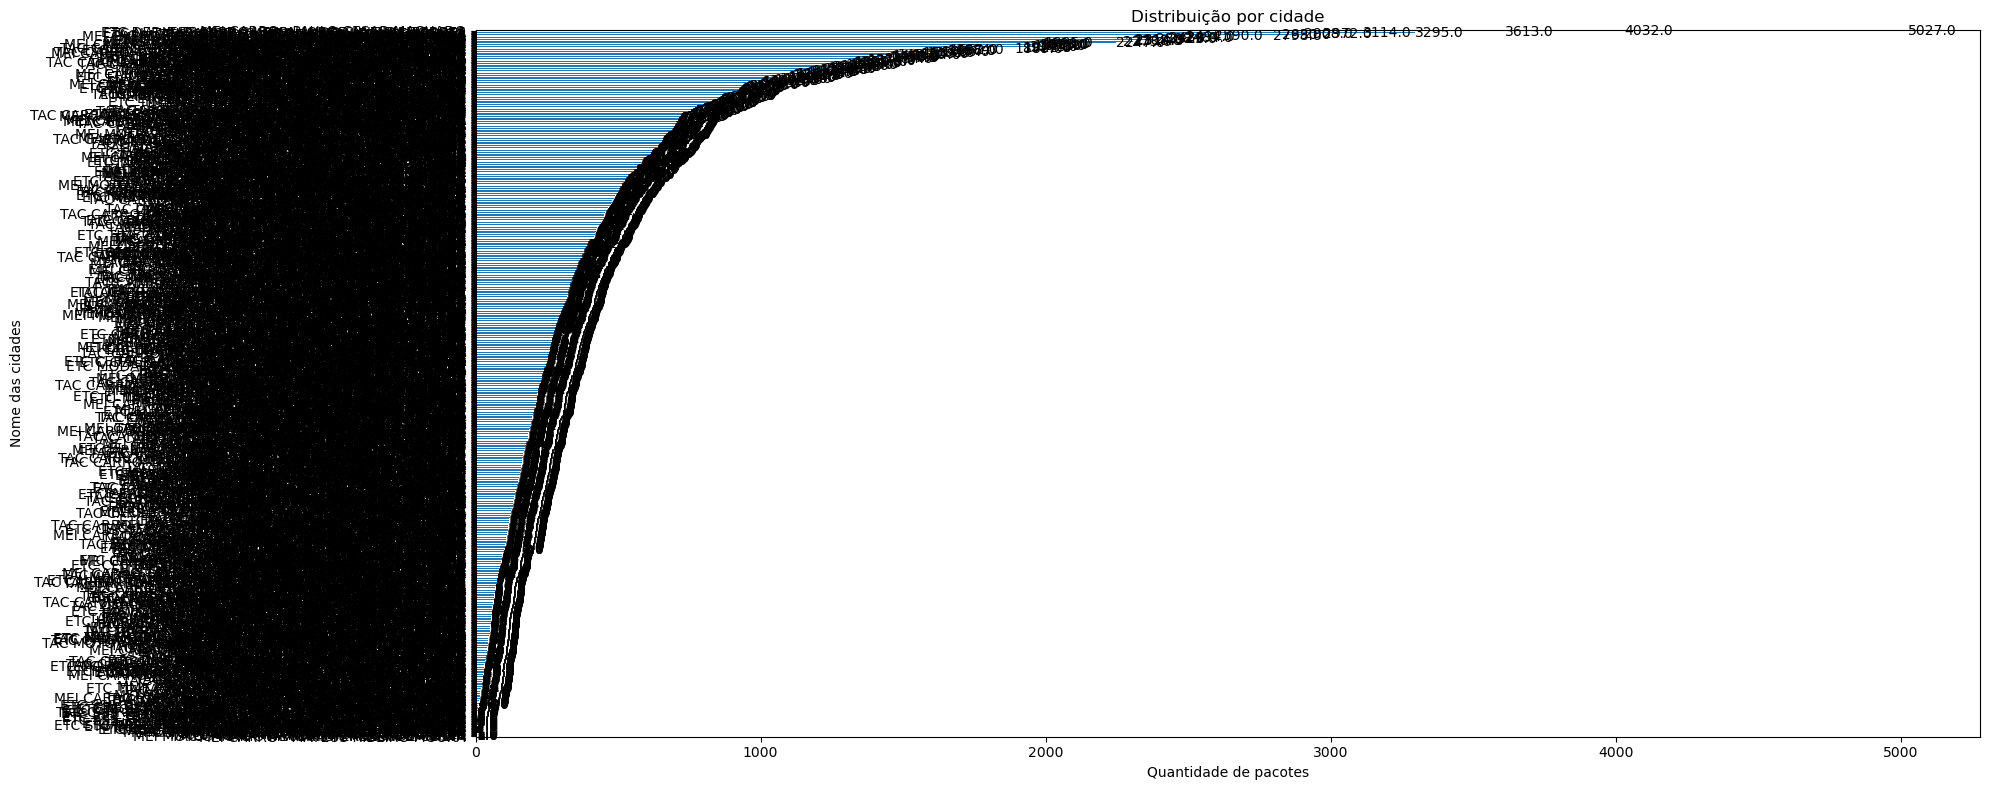

In [249]:
# Instanciando a contagem de pacotes entregues por cidade

df_cidades_pacotes = df_fechamento_full['ENTREGADOR'].value_counts().sort_values(ascending=True)

# Plotando grafico de barras verticais com as cidades que mais tiveram pacotes entregues

#função pyplot.bar()
fig ,ax = plt.subplots(figsize = (20,8))

#Plotar o graficos
df_cidades_pacotes.plot(kind='barh' , legend= False)
plt.title("Distribuição por cidade")
plt.xlabel('Quantidade de pacotes')
plt.ylabel('Nome das cidades')

# Acrescenta os valores sobre as barras

b1 = ax.bar_label(ax.containers[0], fmt="%.1f")
b1[13].set_color("#ff9900")

# Armazena o gráfico (em diferentes formatos):
# - formatos vetoriais (NÃO perdem resolução quando redimensionados)
#plt.savefig("barras-valor.pdf")
#plt.savefig("barras-valor.svg")
# - formato rasterizado (perde resolução quando redimensionado)
plt.savefig("barras-valor.png", dpi = 150, format = "png")

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()
# Exibir o grafico
plt.show()


